In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as stats

In [2]:
# load the data

ds = pd.read_csv('train.csv')

In [3]:
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


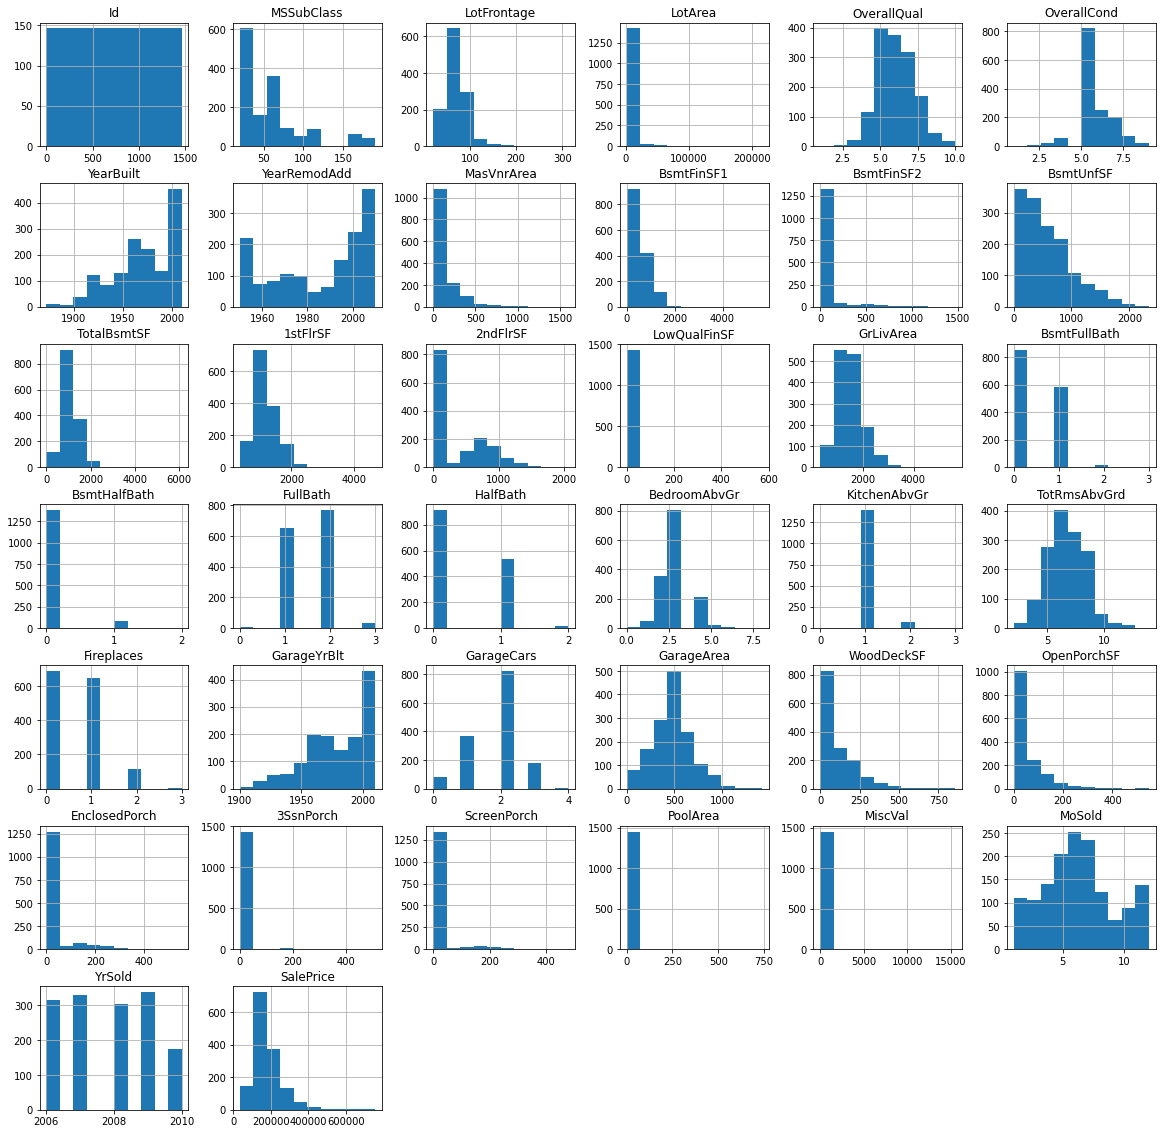

In [4]:
# let's plot the distribution of the numerical variables

ds.hist(figsize=(20,20))
plt.show()

## Q-Q Plot
To visualise the distribution of the variables, we plot a histogram and a Q-Q plot. In the Q-Q plots, if the variable is normally distributed, the values of the variable should fall in a 45 degree line when plotted against the theoretical quantiles. 



In [5]:
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

def plot_data(ds, variable):
    # function to plot a histogram and a Q-Q plot side by side
    
    plt.figure(figsize=(10,6))
    plt.subplot(1, 2, 1)
    ds[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(ds[variable], dist="norm", plot=plt)
    plt.show()

### Original distribution

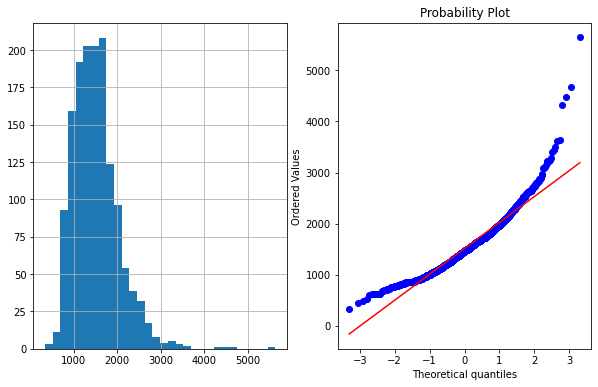

In [8]:
plot_data(ds, 'GrLivArea')


We can see in the plots that the variable is not normally distributed, it is skewed towards right. The values depart from the red line towards the ends of the distribution.

### Logarithmic Transformation

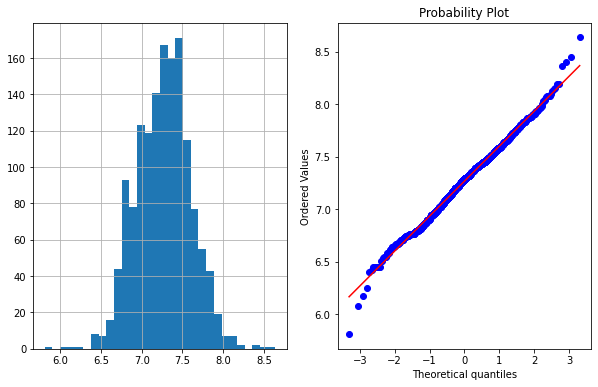

In [9]:
### Logarithmic transformation

ds['GrLivArea_log'] = np.log(ds['GrLivArea'])

plot_data(ds, 'GrLivArea_log')

Transforming the feature wit logarithmic transformation turned the right skewed data towards more alike a normal distribution.

### Reciprocal Transformation

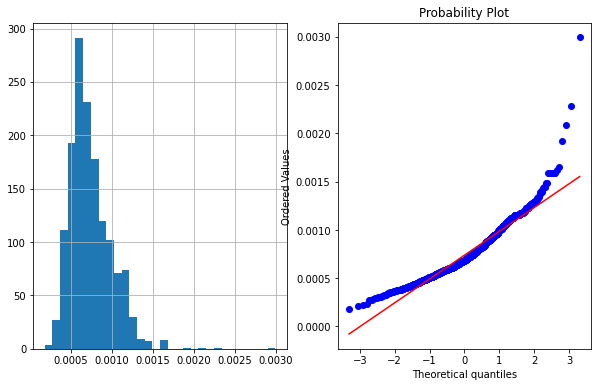

In [10]:
### Reciprocal transformation

ds['GrLivArea_reciprocal'] = 1 / (ds['GrLivArea']) 

plot_data(ds, 'GrLivArea_reciprocal')

Reciprocal transformation didn't work well.

### Square Root Transformation

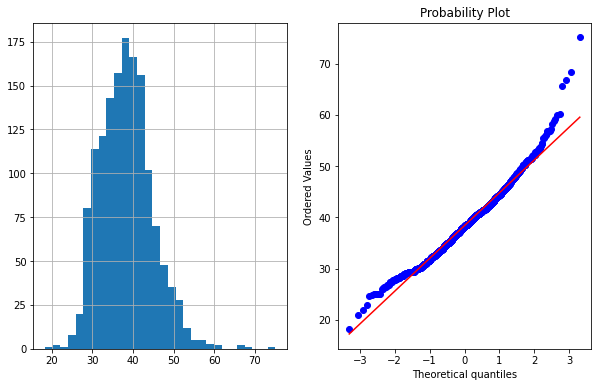

In [11]:
ds['GrLivArea_sqr'] = ds['GrLivArea']**(1/2) 

plot_data(ds, 'GrLivArea_sqr')

It did quite well to transform the skewed distribution.

### Exponential

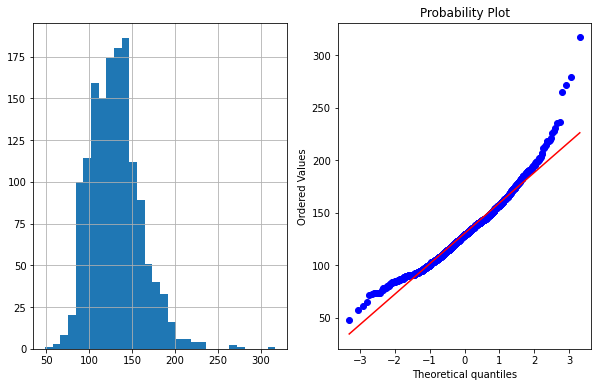

In [12]:
ds['GrLivArea_exp'] = ds['GrLivArea']**(1/1.5) # we can vary the exponent as needed

# np.power(data['GrLivArea'], any exponent we want)

plot_data(ds, 'GrLivArea_exp')

The exponential transformation did not work so nicely for this variable.



### Box-Cox transformation
The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ if λ!=0, 

log(Y) otherwise.

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

Briefly, for each λ (the transformation tests several λs), the correlation coefficient of the Probability Plot (Q-Q plot below, correlation between ordered values and theoretical quantiles) is calculated (this optimisation equation actually varies with the implementation).

The value of λ corresponding to the maximum correlation on the plot is then the optimal choice for λ.

In python, we can evaluate and obtain the best λ with the stats.boxcox function from the package scipy.



Optimal value of λ:  0.006304841218621503


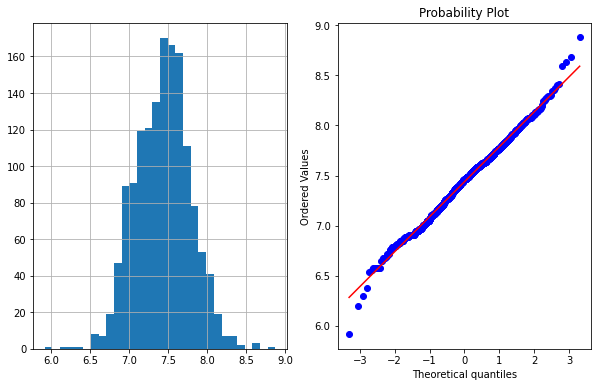

In [13]:
ds['GrLivArea_boxcox'], param = stats.boxcox(ds['GrLivArea']) 

print('Optimal value of λ: ', param)

plot_data(ds, 'GrLivArea_boxcox')

Box-Cox transformation is quite a good approach for this

### Yeo-Johnson
Yeo-Johnson is the same as Box-Cox for the positive values of the variable, but it has different equations for the negative values of the variable as described here

Again, the function searches over a bunch of λ and selects the one that returns the best fit to a normal distribution.

In [14]:
# to avoid a NumPy error
ds['GrLivArea'] = ds['GrLivArea'].astype('float')

Optimal value of λ:  0.005539641278705955


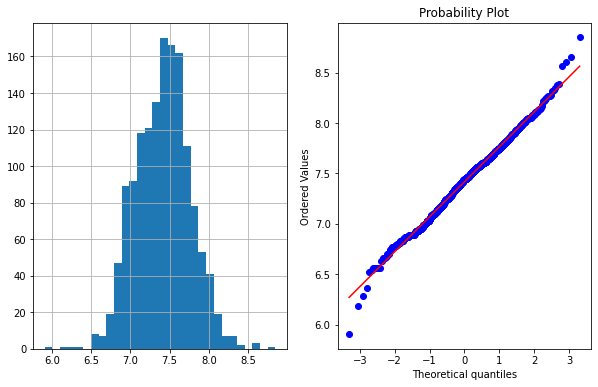

In [15]:
ds['GrLivArea_yeojohnson'], param = stats.yeojohnson(ds['GrLivArea']) 

print('Optimal value of λ: ', param)

plot_data(ds, 'GrLivArea_yeojohnson')

We can see that after the transformation, the quantiles are somewhat more aligned over the 45 degree line with the theoreical quantiles of the Gaussian distribution.

